Ejemplo 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carga el conjunto de datos Iris
iris = load_iris()
X = iris.data  # Características de las flores

In [4]:
# Configura el modelo K-Means con un rango de K (número de clusters) para probar
k_range = range(2, 11)
mean_silhouette_scores = []

# El silhouette_score es una métrica de evaluación comúnmente utilizada para
# medir la calidad de los clusters en un algoritmo de clustering, como K-Means.
# Esta métrica cuantifica cuán similares son los objetos dentro de un mismo
# cluster (cohesión) en comparación con los objetos en clusters vecinos
# (separación).
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    mean_silhouette_scores.append(silhouette_avg)

In [5]:
# Encuentra el valor óptimo de K basado en el coeficiente de silueta
optimal_k = k_range[np.argmax(mean_silhouette_scores)]

In [6]:
# Configura el modelo K-Means con el valor óptimo de K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

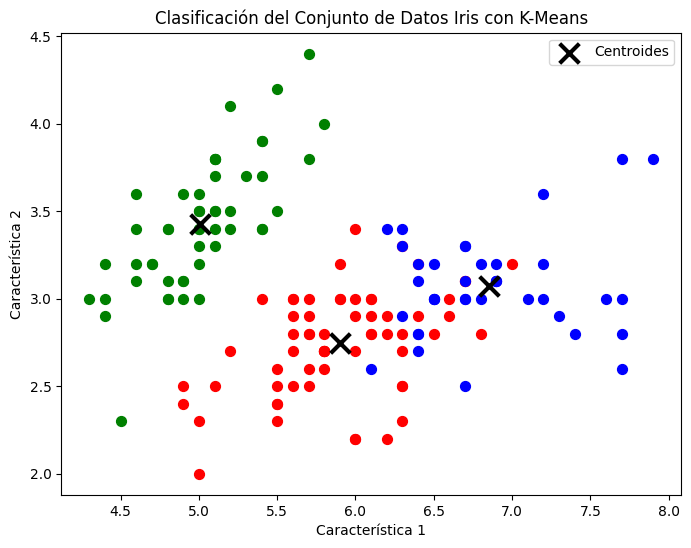

In [7]:
# Asignar cada punto de datos a un cluster
cluster_labels = kmeans.predict(X)

# Extraer los centroides de los clusters
centroids = kmeans.cluster_centers_

# Crear un gráfico de dispersión para visualizar la clasificación
plt.figure(figsize=(8, 6))

# Colores para representar los clusters
colors = ['red', 'green', 'blue']

# Asignar un color a cada punto de datos según su cluster
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], c=colors[cluster_labels[i]], s=50)

# Marcar los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroides')

# Etiquetar los ejes
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Mostrar el gráfico
plt.legend()
plt.title('Clasificación del Conjunto de Datos Iris con K-Means')
plt.show()

Ejemplo 2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import norm

In [9]:
# Generamos datos de ejemplo
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

In [10]:
# Aplicamos K-Means para agrupar los datos
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [11]:
# Obtenemos las etiquetas de clúster para cada punto de datos
labels = kmeans.labels_

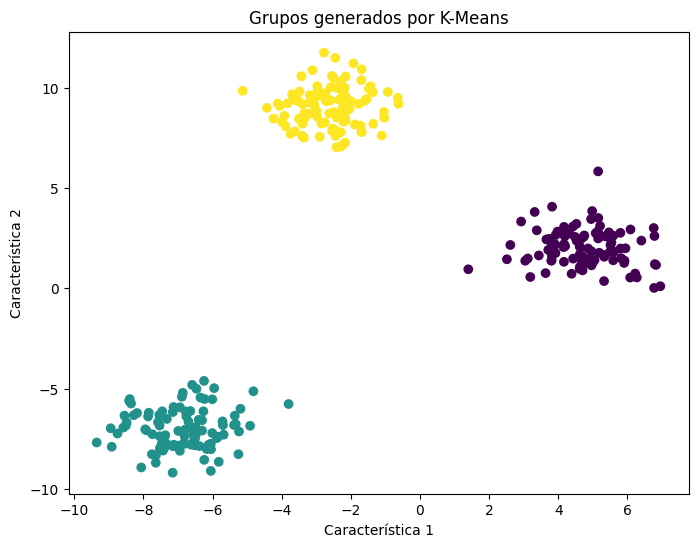

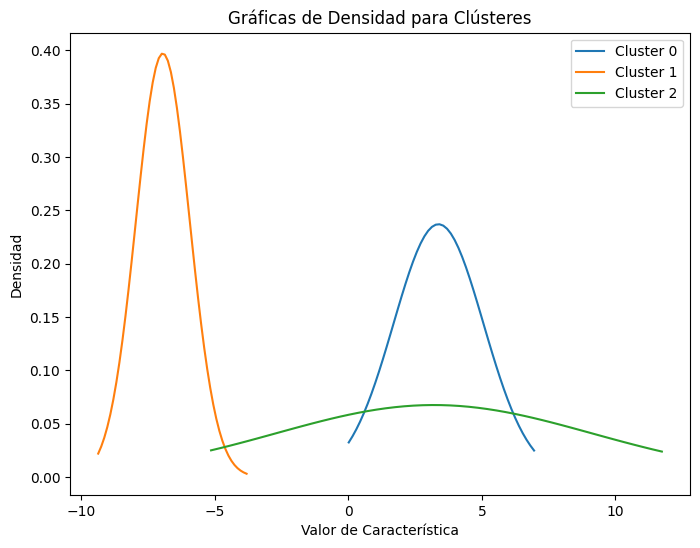

In [12]:
# Visualizamos los datos y los clústeres
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Grupos generados por K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Graficamos las densidades de cada clúster
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    cluster_data = X[labels == i]
    density = norm.pdf(np.linspace(cluster_data.min(), cluster_data.max()),
                       cluster_data.mean(), cluster_data.std())
    plt.plot(np.linspace(cluster_data.min(), cluster_data.max()), density, label=f'Cluster {i}')

plt.title('Gráficas de Densidad para Clústeres')
plt.xlabel('Valor de Característica')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Ejemplo 3

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [14]:
# Generamos datos de ejemplo
n_samples = 300
n_features = 2
n_clusters_range = range(1, 11)  # Probaremos k desde 1 hasta 10
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=random_state)

In [15]:
# Calculamos la inercia para diferentes valores de k
inertia = []
for k in n_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init = 'auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

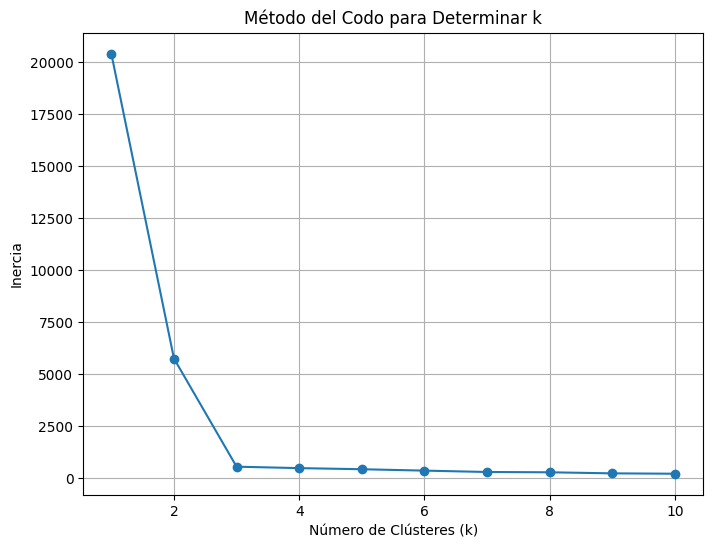

In [16]:
# Graficamos la inercia en función de k
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia, marker='o')
plt.title('Método del Codo para Determinar k')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Ejemplo 4

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [18]:
# Cargar los datos de películas y calificaciones de usuarios
movies = pd.read_csv('/content/drive/MyDrive/Code/BEDU/All_Datasets/Datasets/BEDU Datasets/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Code/BEDU/All_Datasets/Datasets/BEDU Datasets/ratings.csv')

In [19]:
movies.head()

,MovieID,Title,Genres,Unnamed: 3,Unnamed: 4
0,1,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN
1,2,Jumanji (1995),Adventure|Children's|Fantasy,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN


In [20]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [23]:
# Crear una tabla pivote con las calificaciones de usuarios como valores y las películas como columnas
user_movie_ratings = ratings.pivot(index='UserID', columns='MovieID', values='Rating')
user_movie_ratings.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Rellenar valores nulos con 0
user_movie_ratings = user_movie_ratings.fillna(0)
user_movie_ratings.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
user_movie_ratings_scaled = scaler.fit_transform(user_movie_ratings)
user_movie_ratings_scaled

array([[ 1.7587341 , -0.34446173, -0.27495584, ..., -0.09136796,
        -0.07885485, -0.25386356],
       [-0.70171755, -0.34446173, -0.27495584, ..., -0.09136796,
        -0.07885485, -0.25386356],
       [-0.70171755, -0.34446173, -0.27495584, ..., -0.09136796,
        -0.07885485, -0.25386356],
       ...,
       [-0.70171755, -0.34446173, -0.27495584, ..., -0.09136796,
        -0.07885485, -0.25386356],
       [-0.70171755, -0.34446173, -0.27495584, ..., -0.09136796,
        -0.07885485, -0.25386356],
       [ 0.77455344, -0.34446173, -0.27495584, ..., -0.09136796,
        -0.07885485, -0.25386356]])

In [26]:
# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=50)
user_movie_ratings_pca = pca.fit_transform(user_movie_ratings_scaled)
user_movie_ratings_pca

array([[ -8.6032614 ,   0.24334314,  -0.93535582, ...,  -1.80178928,
         -1.2127513 ,   0.39422997],
       [ -3.46977754,   0.68048566,  -0.09478576, ...,   0.12346206,
         -0.13848179,   0.93928375],
       [ -8.68455695,  -1.82652133,   0.73769875, ...,   0.13324445,
          0.70498552,  -0.16502403],
       ...,
       [-10.97342235,   0.79293146,   0.218277  , ...,  -0.03925634,
         -0.50146693,   0.08920941],
       [ -3.91797213,   8.18251374,   3.91731326, ...,   0.80906661,
         -3.09551741,  -2.47032328],
       [  9.47168057,  22.98599581,   0.13674471, ...,  -0.70092327,
         -0.2122229 ,   1.29157702]])

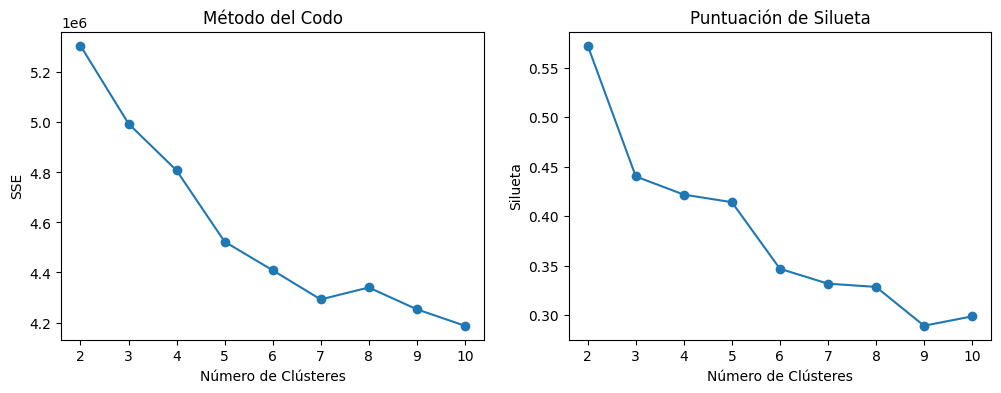

In [27]:
# Encontrar el número óptimo de clústeres utilizando el método del codo
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(user_movie_ratings_pca)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(user_movie_ratings_pca, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silueta')
plt.show()

In [28]:
# Basado en el método del codo y la puntuación de silueta, elige el número óptimo de clústeres (puede ser 4 en este caso)
n_clusters = 4

# Entrenar el modelo K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(user_movie_ratings_pca)


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [29]:
# Asignar etiquetas de clúster a cada usuario
user_movie_ratings['cluster'] = kmeans.labels_
user_movie_ratings

MovieID,1,2,3,4,5,6,7,8,9,10,...,3944,3945,3946,3947,3948,3949,3950,3951,3952,cluster
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [33]:
# Recomendar películas para un usuario en particular (por ejemplo, userId = 1)
user_id_to_recommend = 1
user_cluster = user_movie_ratings.loc[user_id_to_recommend, 'cluster']
recommended_movies = user_movie_ratings[user_movie_ratings['cluster'] == user_cluster].sample(n=5).drop(columns='cluster')

# Obtener información de las películas recomendadas
recommended_movie_ids = recommended_movies.columns
recommended_movie_info = movies[movies['MovieID'].isin(recommended_movie_ids)]

print("Películas recomendadas para el usuario {}:".format(user_id_to_recommend))
recommended_movie_info[['Title', 'Genres']]

Películas recomendadas para el usuario 1:


,Title,Genres
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
...,...,...
3878,Meet the Parents (2000),Comedy
3879,Requiem for a Dream (2000),Drama
3880,Tigerland (2000),Drama
3881,Two Family House (2000),Drama
